In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Load the data set and check for the structure

In [279]:
# Reading the csv data
supermarket_sales = pd.read_csv("supermarket_sales - Sheet1.csv")
supermarket_sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [280]:
import warnings


In [281]:
warnings.filterwarnings('ignore')

In [282]:
# Checking the columns and type
supermarket_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [283]:
# Checking for number of rows and columns
supermarket_sales.shape

(1000, 17)

In [284]:
# Statistical information of numerical columns
supermarket_sales.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [285]:
supermarket_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

## Step 2: Data Cleaning

In [286]:
# Check for missing values
supermarket_sales.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [287]:
# Check for duplicate values
supermarket_sales.duplicated().sum()

0

In [288]:
supermarket_sales.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

## Converting date  object to datetime

In [289]:
# Converting Date object to datetime
supermarket_sales['Date'] = pd.to_datetime(supermarket_sales['Date'], format = '%m/%d/%Y')
supermarket_sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [290]:
supermarket_sales.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [291]:
# Checking the unique City, Customer Type, Gender, Product Line, Payments
print('City: ', supermarket_sales['City'].unique())
print('Branch: ',supermarket_sales['Branch'].unique())
print('Customer Type: ',supermarket_sales['Customer type'].unique())
print('Gender: ',supermarket_sales['Gender'].unique())
print('Product Line: ',supermarket_sales['Product line'].unique())
print('Payment: ',supermarket_sales['Payment'].unique())

City:  ['Yangon' 'Naypyitaw' 'Mandalay']
Branch:  ['A' 'C' 'B']
Customer Type:  ['Member' 'Normal']
Gender:  ['Female' 'Male']
Product Line:  ['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']
Payment:  ['Ewallet' 'Cash' 'Credit card']


In [292]:
# Deriving Month and Year from Date 
supermarket_sales['Month'] = supermarket_sales['Date'].dt.month
supermarket_sales['Year'] = supermarket_sales['Date'].dt.year
print('Year: ',supermarket_sales['Year'].unique())
print('Month: ',supermarket_sales['Month'].unique())

Year:  [2019]
Month:  [1 3 2]


In [293]:
cat=[]
num=[]
for column in supermarket_sales.columns:
    if supermarket_sales[column].nunique() > 10:
        num.append(column)
    else:
        cat.append(column)
    
            

In [294]:
cat


['Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Quantity',
 'Payment',
 'gross margin percentage',
 'Month',
 'Year']

In [295]:
num

['Invoice ID',
 'Unit price',
 'Tax 5%',
 'Total',
 'Date',
 'Time',
 'cogs',
 'gross income',
 'Rating']

## Hypothesis Testing

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Fashion accessories'),
  Text(1, 0, 'Food and beverages'),
  Text(2, 0, 'Electronic accessories'),
  Text(3, 0, 'Sports and travel'),
  Text(4, 0, 'Home and lifestyle'),
  Text(5, 0, 'Health and beauty')])

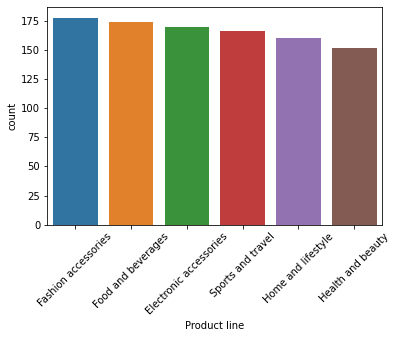

In [296]:
# a) Food and beverages are the most sold product line
sns.countplot(supermarket_sales['Product line'],
              order = supermarket_sales['Product line'].value_counts().index)
plt.xticks(rotation=45)
# Conclusion: Hypothesis is false as Fashion accessories are most sold product line

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

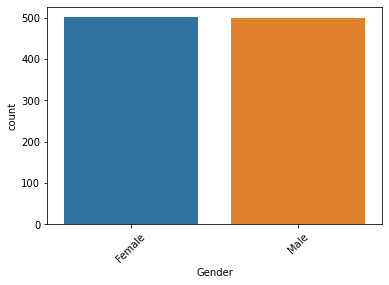

In [297]:
# b) Female buyers are greater than male buyers
sns.countplot(supermarket_sales['Gender'],
              order = supermarket_sales['Gender'].value_counts().index)
plt.xticks(rotation=45)
# Conclusion: Hypothesis is true as Female buyers are more

(array([0, 1, 2]),
 [Text(0, 0, 'Ewallet'), Text(1, 0, 'Cash'), Text(2, 0, 'Credit card')])

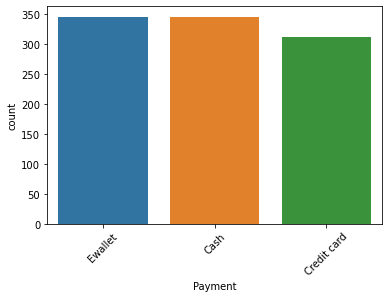

In [298]:
# c) Cash is the most convinient mode of payment
sns.countplot(supermarket_sales['Payment'],
              order = supermarket_sales['Payment'].value_counts().index)
plt.xticks(rotation=45)
# Conclusion: Hypothesis is false as Ewallet is preferred more than cash or credit card

(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '3'), Text(2, 0, '2')])

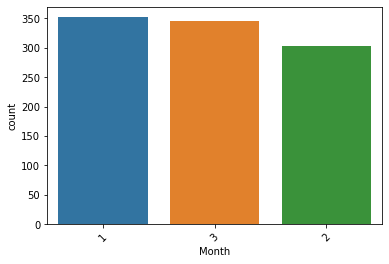

In [299]:
# d) January month has the most purchase in 2019
sns.countplot(supermarket_sales['Month'],
              order = supermarket_sales['Month'].value_counts().index)
plt.xticks(rotation=45)
# Conclusion: Hypothesis is true followed by March and February

<AxesSubplot:xlabel='Unit price', ylabel='Total'>

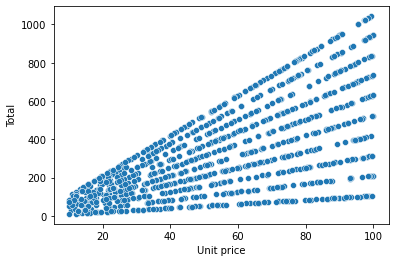

In [300]:
# e) There is a linear relationship between Total and Price
sns.scatterplot(x=supermarket_sales['Unit price'], y=supermarket_sales['Total'])
# Conclusion: The hypothesis is true as the relationship seen is linear

## Univariate Analysis

<AxesSubplot:xlabel='Branch', ylabel='count'>

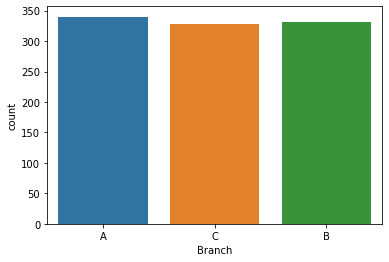

In [301]:
#aggregate sales among branches(categorical column)
sns.countplot(supermarket_sales['Branch'])

<AxesSubplot:ylabel='Branch'>

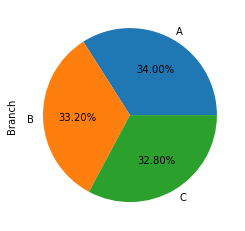

In [302]:
supermarket_sales['Branch'].value_counts().plot(kind="pie",autopct="%1.2f%%")

<AxesSubplot:xlabel='Rating', ylabel='Density'>

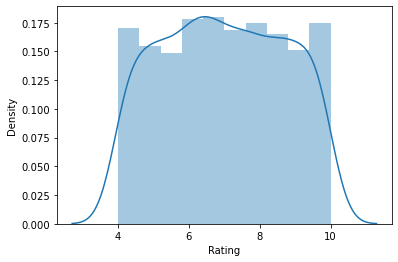

In [303]:
#Distribution of customer Rating(Numerical column)
sns.distplot(supermarket_sales['Rating'])

In [304]:
supermarket_sales['Rating'].skew()

0.00900964876573073

<AxesSubplot:xlabel='cogs', ylabel='Density'>

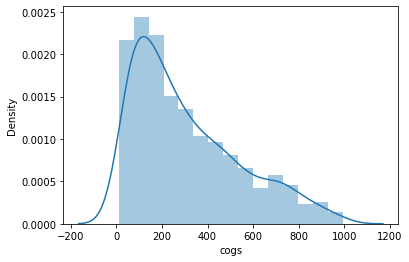

In [305]:
#distribution of cost of goods sold(Numerical coulmn)
sns.distplot(supermarket_sales['cogs'])

In [306]:
supermarket_sales['cogs'].skew()

0.8925698049581418

<AxesSubplot:xlabel='cogs'>

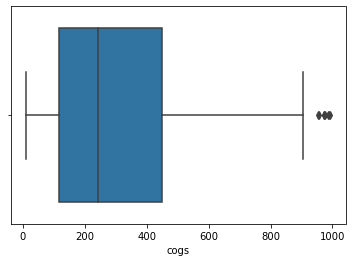

In [307]:
sns.boxplot(supermarket_sales['cogs'])

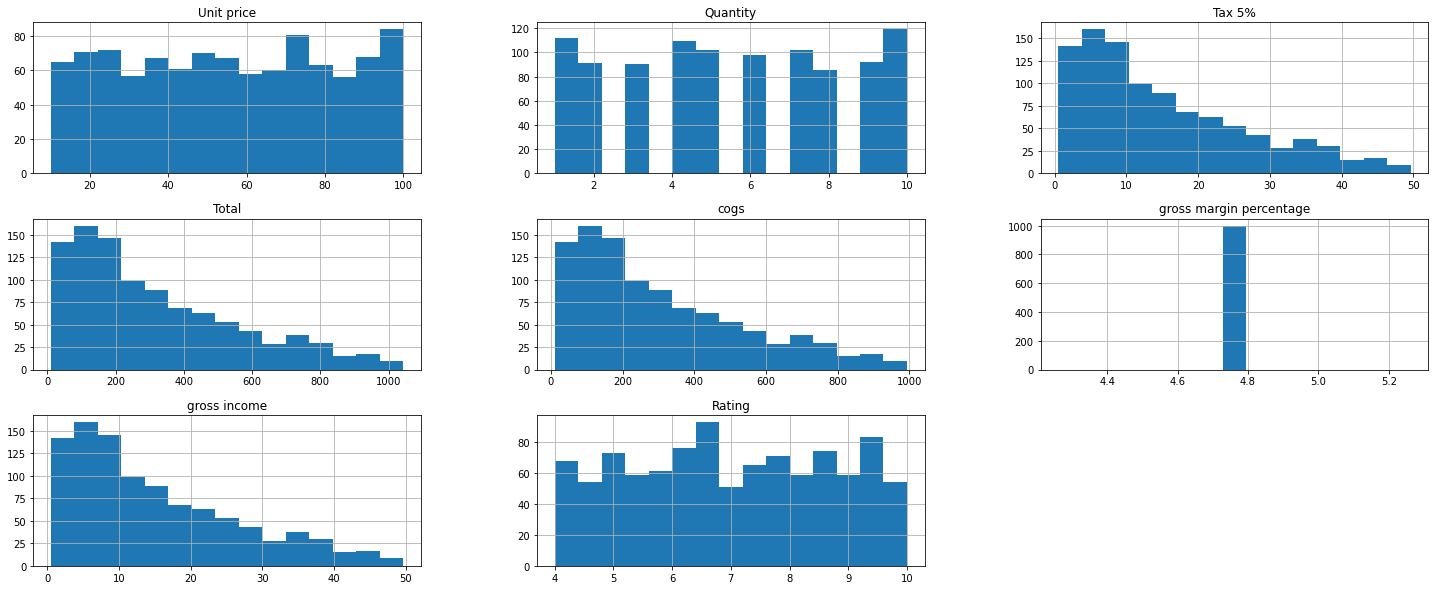

In [308]:
# Histogram for numerical data
numerical_cols = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating']
supermarket_sales[numerical_cols].hist(bins=15, figsize=(25, 10), layout=(3, 3));


(array([1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(1, 0, 'Unit price'),
  Text(2, 0, 'Quantity'),
  Text(3, 0, 'Tax 5%'),
  Text(4, 0, 'Total'),
  Text(5, 0, 'cogs'),
  Text(6, 0, 'gross margin percentage'),
  Text(7, 0, 'gross income'),
  Text(8, 0, 'Rating')])

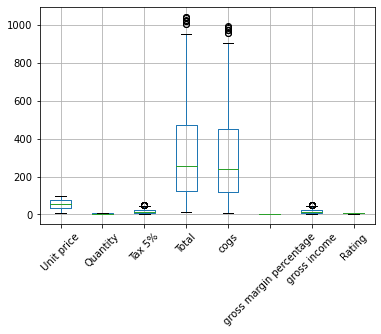

In [309]:
# Boxplot for numerical data
supermarket_sales[numerical_cols].boxplot()
plt.xticks(rotation=45)

(array([0, 1]), [Text(0, 0, 'Member'), Text(1, 0, 'Normal')])

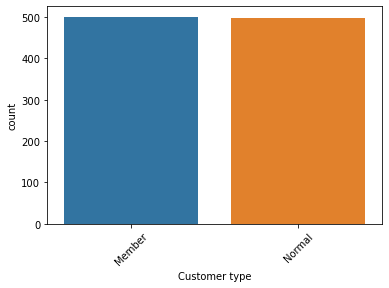

In [310]:
# Barplot for categorical data
sns.countplot(supermarket_sales['Customer type'],
              order = supermarket_sales['Customer type'].value_counts().index)
plt.xticks(rotation=45)

## Bivariate and Multivariate Analysis

### Does the cost of Goods sold affect the  Ratings that the customer provide?(Numerical-Numerical)


<AxesSubplot:xlabel='cogs', ylabel='Rating'>

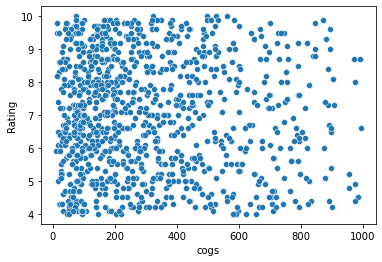

In [311]:
sns.scatterplot(supermarket_sales['cogs'],supermarket_sales['Rating'])

### Does gross income Affect The Ratings That  the CustomersProvide?(Numerical-Numerical)

<AxesSubplot:xlabel='gross income', ylabel='Rating'>

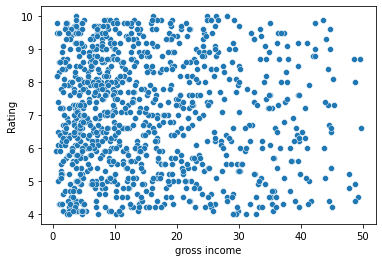

In [312]:
sns.scatterplot(supermarket_sales['gross income'],supermarket_sales['Rating'])

#### Find The Most Profitable Branch as Per The Gross Income(Numerical-Categorical)

<AxesSubplot:xlabel='Branch', ylabel='gross income'>

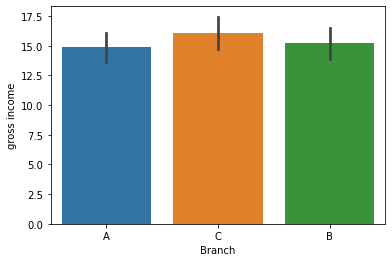

In [313]:
sns.barplot(supermarket_sales['Branch'],supermarket_sales['gross income'])

<AxesSubplot:xlabel='Branch', ylabel='gross income'>

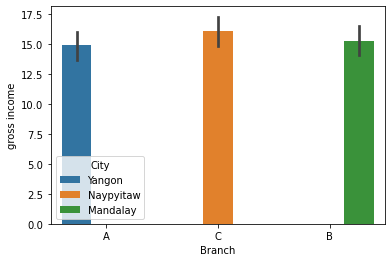

In [314]:
sns.barplot(supermarket_sales['Branch'],supermarket_sales['gross income'],hue=supermarket_sales['City'])

### Is there any relationship between Gender and Gross Income? (Numerical -Categorical)

<AxesSubplot:xlabel='Gender', ylabel='gross income'>

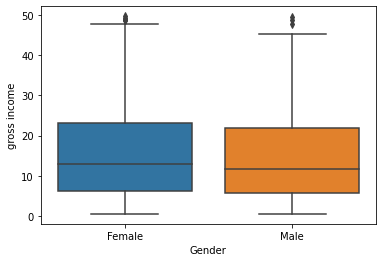

In [315]:
sns.boxplot(supermarket_sales['Gender'],supermarket_sales['gross income'])

<AxesSubplot:xlabel='Gender', ylabel='gross income'>

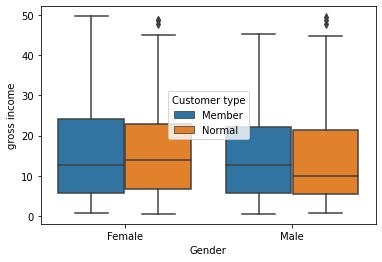

In [316]:
sns.boxplot(supermarket_sales['Gender'],supermarket_sales['gross income'],hue=supermarket_sales['Customer type'])

### Find the Product Line That generates the Most Income. (Numerical-Categorical)

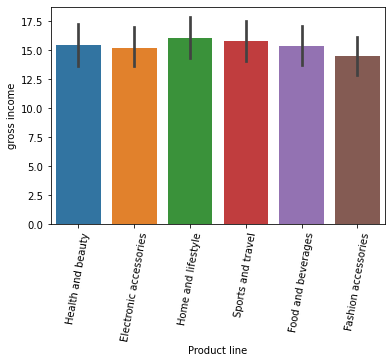

In [317]:
sns.barplot(supermarket_sales['Product line'],supermarket_sales['gross income'])
plt.xticks(rotation=80)
plt.show()

### Find highest Unit price in the Product Line (Numerical- Categorical)

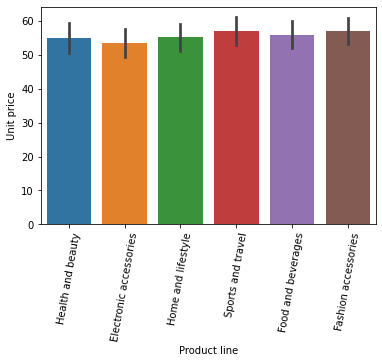

In [318]:
sns.barplot(supermarket_sales['Product line'],supermarket_sales['Unit price'])
plt.xticks(rotation=80)
plt.show()

### Find Different Payment Methods Used By Customers CityWise.(Categorical-Categorical)

In [319]:
pd.crosstab(supermarket_sales['City'],supermarket_sales['Payment'])

Payment,Cash,Credit card,Ewallet
City,,,
Mandalay,110,109,113
Naypyitaw,124,98,106
Yangon,110,104,126


<AxesSubplot:xlabel='Payment', ylabel='City'>

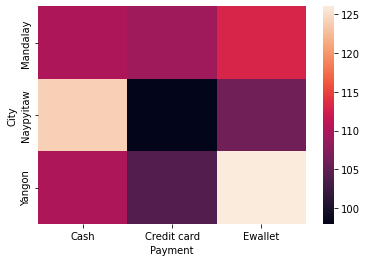

In [320]:
sns.heatmap(pd.crosstab(supermarket_sales['City'],supermarket_sales['Payment']))

### Which Product Line is Purchased In the Highest Quantity?

<AxesSubplot:xlabel='Product line'>

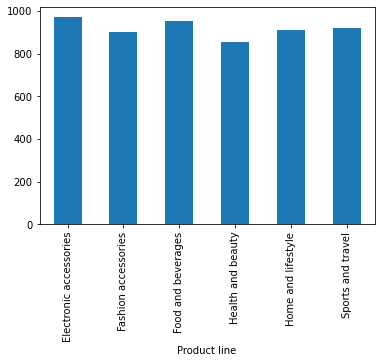

In [321]:
(supermarket_sales.groupby('Product line').sum()['Quantity']).plot(kind='bar')

### Display Daily Sales by Day Of the Week

In [322]:
dw_mapping={
    0:'Mon',
    1:'Tue',
    2:'Wed',
    3:'Thur',
    4:'Fri',
    5:'Sat',
    6:'Sun'
}

In [323]:
supermarket_sales['day_of_week']=supermarket_sales['Date'].dt.dayofweek.map(dw_mapping)

<AxesSubplot:>

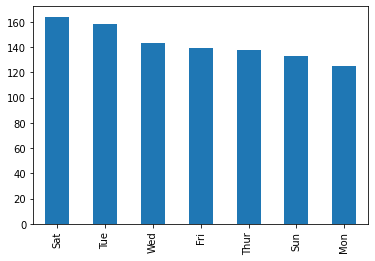

In [324]:
supermarket_sales['day_of_week'].value_counts().plot(kind='bar')

### What will be the Highest Months for Sales

In [325]:
month_mapping={
    1:"Jan",
    2:"Feb",
    3:"Mar"
}

In [326]:
supermarket_sales['month']=supermarket_sales['Date'].dt.dayofweek.map(month_mapping)

<AxesSubplot:>

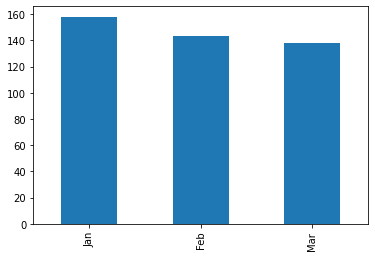

In [327]:
supermarket_sales['month'].value_counts().plot(kind='bar')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Fashion accessories'),
  Text(1, 0, 'Electronic accessories'),
  Text(2, 0, 'Food and beverages'),
  Text(3, 0, 'Home and lifestyle'),
  Text(4, 0, 'Sports and travel'),
  Text(5, 0, 'Health and beauty')])

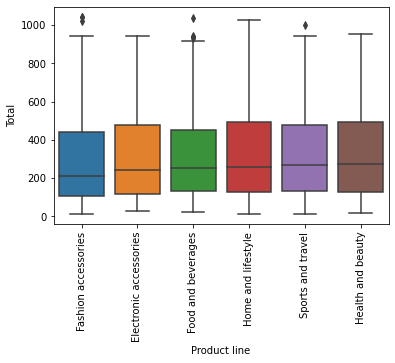

In [328]:

# Product Line Vs Total boxplot
sorted_salesdata = supermarket_sales.groupby(['Product line'])['Total'].median().sort_values()
sns.boxplot(x='Product line', y='Total', data=supermarket_sales, order=list(sorted_salesdata.index))
plt.xticks(rotation=90)

(array([0, 1, 2]),
 [Text(0, 0, 'Yangon'), Text(1, 0, 'Mandalay'), Text(2, 0, 'Naypyitaw')])

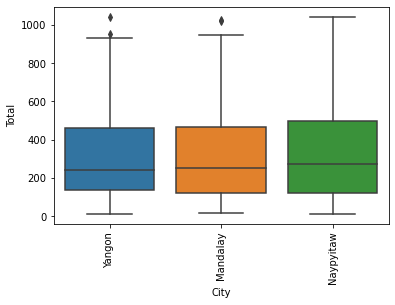

In [329]:
# City Vs Total boxplot
sorted_salesdata = supermarket_sales.groupby(['City'])['Total'].median().sort_values()
sns.boxplot(x='City', y='Total', data=supermarket_sales, order=list(sorted_salesdata.index))
plt.xticks(rotation=90)

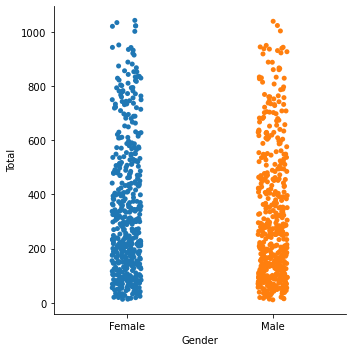

In [330]:
# Crating scatterplot for categorical data for Gender
sns.catplot(x="Gender", y="Total", data=supermarket_sales)

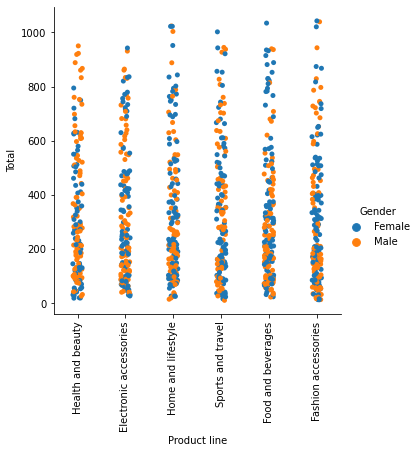

In [338]:
# Distribution of Product Line for Gender
sns.catplot(x="Product line", y="Total", data=supermarket_sales, hue='Gender')
plt.xticks(rotation=90)
plt.show()

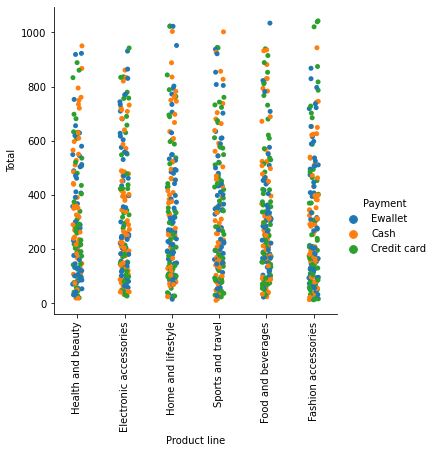

In [337]:
# Distribution of Product Line for Payment
sns.catplot(x="Product line", y="Total", data=supermarket_sales, hue='Payment')
plt.xticks(rotation=90)
plt.show()
        

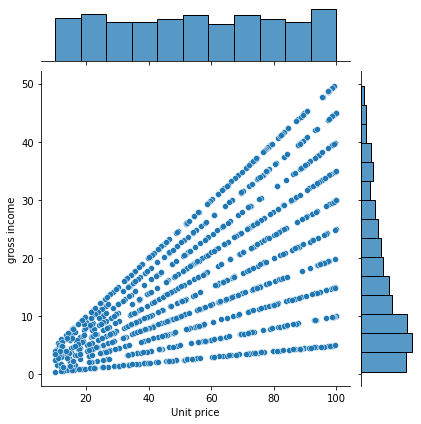

In [333]:
# Plot showing the combination of scatter plot along with histogram
sns.jointplot(x=supermarket_sales['Unit price'], y=supermarket_sales['gross income'])

<AxesSubplot:>

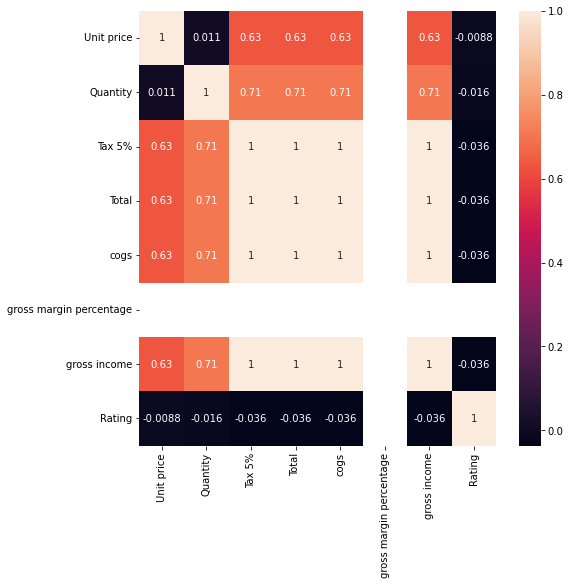

In [334]:
# Creating a correlation heatmaps
plt.figure(figsize=(8, 8))
sns.heatmap(supermarket_sales[numerical_cols].corr(), annot=True)

<Figure size 864x720 with 0 Axes>

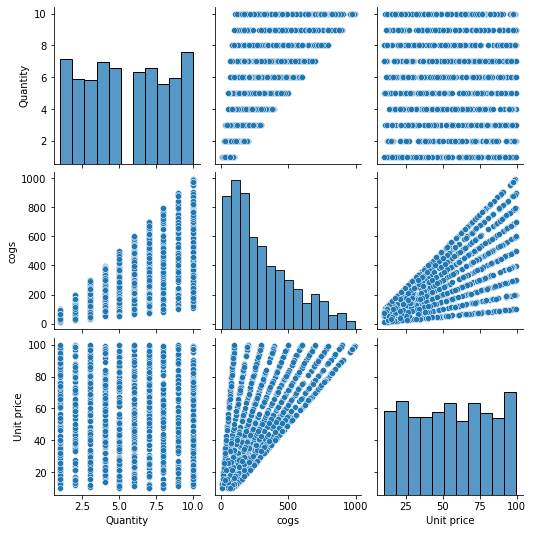

In [336]:
plt.figure(figsize=(12,10))
sns.pairplot(data=supermarket_sales[["Product line","Quantity","cogs","Unit price"]])

### Conclusion:
### We used uni-variate, bi-variate,Multivariate  and correlation analysis to perform basic EDA on the supermarket sales data.

### To summarize below are some of the findings/observations from the data:

### 1.The customer rating is more or less uniform with the mean rating being around 7 and there is no relationship between gross income and customer ratings.
### 2.The data consists of 3 cities/branches. Though branch A has slightly higher sales than the rest, C i.e. Naypyitaw is the most profitable branch in terms of gross income.
### 3.Fashion accessories and food and beverages are the most sold product in Naypyitaw and these products should be focused on along with electronic accessories.
### 4.The most popular payment method is E-wallet and cash payment is also on the higher side.
### 5.There is no particular time trend that can be observed in gross income.
### 6.At an overall level, ‘Sports and Travel’ generates highest gross income.
### 7.Gross income is similar for both male and female, though female customers spend a bit higher at the 75th percentile. Females spend on ‘fashion accessories’ the most and for males surprisingly it is ‘Health and beauty’. Females also spend more on ‘Sports and travel’ which generates highest income overall.
### 8.Using the correlation analysis, one interesting observation has emerged that customer ratings is not related to any variable.
### 9.Most of the customers buy 10 quantities and busiest time of the day is afternoon i.e. around 2 pm which records highest sales. Sales is higher on Tuesdays and Saturdays compared to the rest of the week.
### 10.Though the rating for ‘fashion accessories’ and ‘food and beverages’ is high but the quantity purchased is low. Hence, supply for these products need to be increased.